In [1]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./us_books.csv')

names = list(df)

x = df[names]
y = df['isSold']                      

X_train, X_test, y_train, y_test = train_test_split(df[names], df['isSold'], test_size=0.3)

In [3]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

model = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid = GridSearchCV(model, param_grid, cv=cv, scoring='balanced_accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

In [4]:
grid.best_params_

{'n_neighbors': 6, 'weights': 'uniform'}

In [5]:
grid.best_score_

0.5

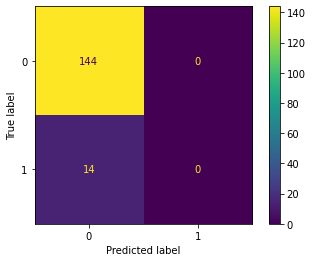

In [7]:
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')

knn.fit(X_train, y_train)

y_pred_one = knn.predict(X_test)

acc_one = accuracy_score(y_test, y_pred_one)

cm = confusion_matrix(y_test, y_pred_one, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot()